<a href="https://colab.research.google.com/github/ColinCMach/LearningPytorch/blob/main/CustomDatasetipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pytroch custom datasets 


we have used some dataset with pytorch before but how do we get our own data into pytorch 
One way we can do it is Custom Datasets
WE aRe going to want to loos into Pytorch custom fata domain libraiies it is simialr steps to other models





In [ ]:
## importubg oytrich abd setting up s=devuce agnoisti code
import torch

from torch import nn


torch.__version__

'1.12.1+cu113'

In [ ]:
# Set up device agnostc code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Get data!!!

NameError: ignored

In [ ]:
import requests
import zipfile
from pathlib import Path

# set up path to a data folader
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
print(image_path)
# if image path does not exits , download it and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists")
else:
  print(f"{image_path} directory does not exist exists, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

#download
with open(data_path / "pizza_steak_sushi.zip", "wb") as f :
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip?raw=true")
  print(f" downloading pizza steeak and sushi data .....")
  f.write(request.content)

# unzip the pizzwa , steak and sushii data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi
data/pizza_steak_sushi directory already exists
 downloading pizza steeak and sushi data .....
Unzipping pizza, steak, and sushi data...


## 2. becomeubg 1 with the data (data preparation and data explotations)

In [ ]:
import os

def walk_through_dir(dir_path):

  """Walks through duir path returning its contents """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi.
there are 3 directories and 0 images in data/pizza_steak_sushi/train.
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza.
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak.
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi.
there are 3 directories and 0 images in data/pizza_steak_sushi/test.
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza.
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak.
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi.


In [ ]:
# set up training an test ppaths

train_dir = image_path / "train"

test_dir = image_path/ "test"
print(train_dir, test_dir)

data/pizza_steak_sushi/train data/pizza_steak_sushi/test


### visializing an uuinmage
 lets write some code to:
 1. Get all oif the image paths
 2. Pick a random image path using python's random.chooice
 3. Get the image class name using pathlib.Path.parent.stem
 4. Since we sare working with images lets open the python image with python pillow- it is the pythom imagin library
 5. We will then show the image and print the meta data
 

data/pizza_steak_sushi/train/steak/2825100.jpg
steak
Random image path: data/pizza_steak_sushi/train/steak/2825100.jpg
Image class: steak
Image height 512
 image width:512


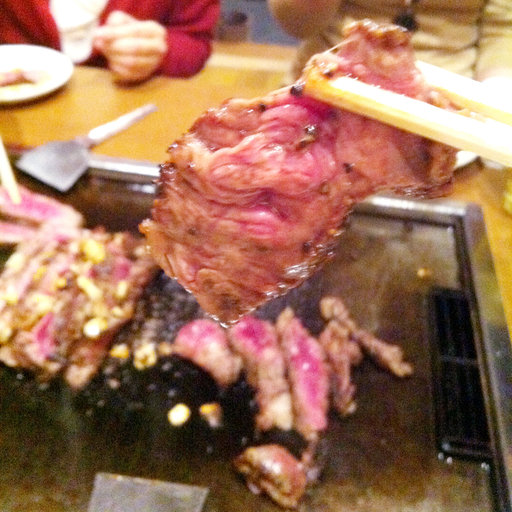

In [ ]:
## visialising an image
import random
from PIL import Image
# random.seed(42)

# get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
#2. Pich a rand image path
random_image_path = random.choice(image_path_list)
print(random_image_path)
#3. get image class from the path name(the image class is the same name oif the directory where the image is stored)
image_class = random_image_path.parent.stem
print(image_class)
#4. open up the image 
img = Image.open(random_image_path)

#5/ PRint metadata 
print(f"Random image path: {random_image_path}")
#5/ PRint metadata 
print(f"Image class: {image_class}")
#5/ PRint metadata 
print(f"Image height {img.height}")
print(f" image width:{img.width}")
img

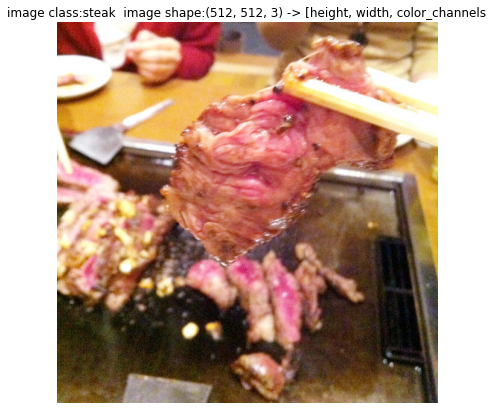

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an array
img_as_array = np.asarray(img)

# plot the mage with matplot lib
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class}  image shape:{img_as_array.shape} -> [height, width, color_channels")
plt.axis(False);

##3. Trandsoforming ddata
Before we can use out image data with pytorch :
1. Turn your target data iunto tensors(In our case, numerical representations of our images).
2. Turn it into a torch.utils.data.Datasets and subsequently a torch.utils.data .DataLoader aand using Dataloader

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Trabsfirnubg data with torch.vision.transorms

In [ ]:
# Write a transforms for image
data_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    # TUrn the image into a tensor
    transforms.ToTensor()

])

In [ ]:
data_transforms(img).dtype

torch.float32

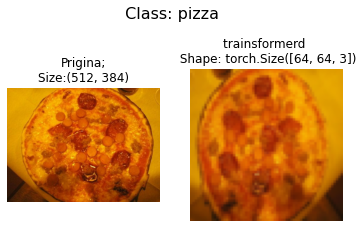

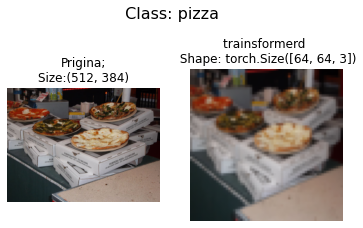

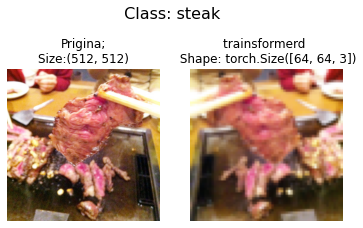

In [ ]:
def plot_transformed_images(image_paths,transform,n = 3, seed = 42):
  # THis selects random images from a path of images andloads/ transforms them into plots the origianl vs the transformed version.
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k = n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Prigina;\nSize:{f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1,2,0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"trainsformerd \n Shape: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f" Class: {image_path.parent.stem}", fontsize = 16)
  
plot_transformed_images(image_paths = image_path_list, transform = data_transforms, n = 3)

## t4, option 1: Loading image data using 'Image Folder'
we can load image classification data using 'torchvision.datasets.ImageFolder

In [ ]:
# use the image folder to create a dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir, transform = data_transforms, target_transform = None)

test_data = datasets.ImageFolder(root = test_dir, transform = data_transforms)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of our dataset
len(train_data), len(test_data)
img, label = train_data[0]
print(f"image tensor:\n {img}")
print(f" image dhsper : {img.shape}")
print(f"Image datatype: {img.dtype}")
print (f" image label : {label}")
print(type(label))

image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original image : torch.Size([3, 64, 64]) -> [color_channels, height, width
 Image permute : torch.Size([64, 64, 3]) -> [heigh, width, color_channels]


Text(0.5, 1.0, 'pizza')

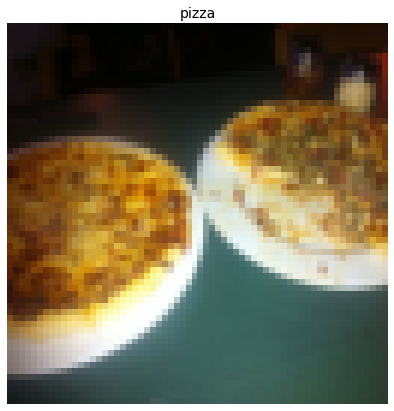

In [ ]:
# rearrange the order of dimensions
img_permute = img.permute(1,2,0)
# print out the different shapes
print(f"Original image : {img.shape} -> [color_channels, height, width")
print(f" Image permute : { img_permute.shape} -> [heigh, width, color_channels]")

# plot the image
plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize = 14)

##4.1 Turn loaded images into DAtaLoader

A DataLoader is gfoing to help us turn our data set in iterables so we can customize our batch siE images at a time

In [ ]:
os.cpu_count()

2

In [ ]:
# Turn out rain and test dataset in Dataloaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers =   os.cpu_count(),
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE ,
                             num_workers = os.cpu_count(),
                             shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f69f14097d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f69f1409790>)

In [ ]:
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = next(iter(train_dataloader))

# batvh size will noew be 1, you can change the ctach size if you like
print(f"Image shape:{img.shape} -> [bacth_size, color channels , height, width]")
print(f"label shape: {label.shape}")
print(label)

Image shape:torch.Size([1, 3, 64, 64]) -> [bacth_size, color channels , height, width]
label shape: torch.Size([1])
tensor([2])


## 5 option 2 Loading image data with a custom dataset
1. want to be able to load images form file
2. want to be able to get class names

3. Want to be able to gfet classes as dictionary from the dataet

Pros:
- Can create a 'dataset out of almost anythings
- Not limited to pytorch datasets functions

Cons:
- Eneve through you create a dataset out of almoist anytith it does not mean it will work...
- Using a custom 'dataset often results in us writing more code, whcih would be prone to errors or performance issues



In [ ]:
import os
import pathlib 
import torch 

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

we want our function to:
1. Get the class names os.scandir() to transverse a target directory ( ideally the directory is in standard image classfication format).
2. Raise an error is the class names are not found( if this hapapens, there might be something wrong with the directory structure
3. Turn the class names in a dict and a list and return them.


In [ ]:
target_directory = train_dir
print(f" Target dir : {target_directory}")
# get the names of the class names fromt he target directory 
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

 Target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str,int]]:
  """ finds the dolfer names in a target dictonary """
  #1. Ge the class namess by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  #2. Raise an error if class names could not be found 
  if not classes:
    raise FileNotFoundError(f" Couldn't find any classes in {directory} ... please check file structure")
  
  # ceate a dictionary of index labels( Computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i , class_name in enumerate(classes)}
  return classes, class_to_idx


In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 create a custom dataset to replicate 'ImageFolder'
To create our own custom data set we want to :
1. Subcless 'torch.utils.data.Dataset 
2. Init our subclass with a target directory(the directory we'd like to get data from) as well as a transform if we'd like to transform our data

3.   Create several attributesd:
- paths - Paths of our pimages
- transform - the transform we'd like to use
- classes - a list of target classes
- class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function ti loader_images() , this functrions will open an image
5. Overwrite the __len()__ method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index

In [ ]:
# write a custom dataset
from torch.utils.data import DataLoader

#1. Subclass torch.utils.data.Dataset

class ImageFolderCustom(Dataset):
  #2. initialize our custom dataset
  def __init__(self,targ_dir:str, transform = None):
    # 3. Create class atributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) 
    # setup transforms 
    self.transform = transform
    # create cleses and class_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  #4. Create a fucntion to load images
  def load_image(self,index:int) -> Image.Image:
    "Opens an image via a pth and returns it"
    image_path = self.paths[index]
    return Image.open(image_path)

  #5. Overwrite len()

  def __len__(self) -> int:
    return len(self.paths)
  #6. OVerwrite __getitem__() methoid to return our particular sample
  def __getitem__(self, index:int) -> Tuple[torch.tensor, int]:
    " Returns one sample if data , data and label(X,y). "
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # this epcts path in format: data_folder/class_names/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Tranform if nessesary
    if self.transform:
      return self.transform(img), class_idx # return data lebel(X,y)
    else:
      return img,class_idx


In [ ]:
#Create a transform
from torchvision.transforms import transforms
train_transforms = transforms.Compose([transforms.Resize(size = (64,64)), transforms.RandomHorizontalFlip(p = 0.5), transforms.ToTensor()] )

test_transforms = transforms.Compose([transforms.Resize(size = (64,64)), transforms.ToTensor()])

In [ ]:
# test out imageFolder Custom 
train_data_custom = ImageFolderCustom(targ_dir = train_dir, transform = train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_dir, transform = test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f69f03d2d50>,
 <__main__.ImageFolderCustom at 0x7f69f03d2c90>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#Check for equalisty between original ImageFolder and
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


### 5.3 Create a fucntion to display a random images

1. Take in a 'Datasey' and a number of othrt parameyetd duvh as classs nameds and how many images to visualize
2. To prevnt the display from getting out of hanf , let's cao the images to 10
3. Set the random seed for reproducability'
4. Get a list of random samlple indexes from the target dataset
5. Set up a matplot lib plot
6. loop through the random sample indexes and plot them with matplotlib
7. Make sure the dimensions of our images line up with matplotlib ( HWC)


In [ ]:
#1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset ,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  #2. adjust display if n is too high
  if n >10 :
    n = 10
    display_shape = False
    print(f" for display , n should not be larger than 10 , setting it too high")
  #3. set the seed
  if seed:
    random.seed(seed)
  #4. Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k = n)
  #5. Set up plot
  plt.figure(figsize=(16,8))
  #6. Loop through random indexes and plot them with matplot lib
  for i , targ_sample in enumerate (random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1] 
    #7. adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)# color_channels, height ,width] -> [height,width, color_channels]
    # plot adjusted samples
    plt.subplot(1,n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]} "
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

In [ ]:
random.sample(range(len(train_data_custom)), k = 10)

[62, 57, 35, 188, 26, 173, 189, 139, 22, 151]

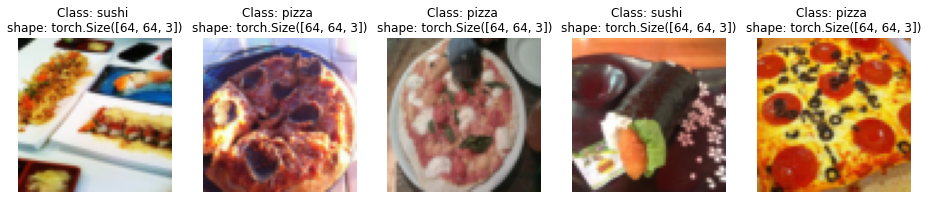

In [ ]:
# Dssiplay random images from the ImageFolder
display_random_images(train_data, n = 5, classes = class_names , seed =42)

 for display , n should not be larger than 10 , setting it too high


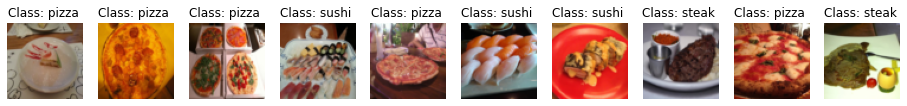

In [ ]:
#display random images from the ImageFolder Custom Dataset
display_random_images(train_data_custom,
                      n = 20, 
                      classes =class_names,
                      seed= None)

### 5.4 Turn custom loaded images into Dataloaders

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size = BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)
test_dataloader_custom = DataLoader(dataset = test_data_custom,
                                    batch_size= BATCH_SIZE,
                                    num_workers = NUM_WORKERS,
                                    shuffle = False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f69dff12790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f69dff12850>)

In [ ]:
# Get the image and labels from the custom dataset
img_custom, label_custom = next(iter(train_dataloader_custom))

print(img_custom.shape, label_custom.shape)

torch.Size([32, 3, 64, 64]) torch.Size([32])


## 6. Other forms of transformations (data augmentation)

Data augmentaion is the processs of arificually addding diversity to your traing data

In the case of image , this may mean varuous transformation to the training images

Thius practove hopefully results in a result that is more generalizable to unseen data
Let's take a look at one particualt type of data augmentation to train pytrovh vidion models to state of the art levels.

In [ ]:
# lets glook at trivial augment 
from torchvision import transforms

train_trainsforms_trivial = transforms.Compose([transforms.Resize(size = (224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                        transforms.ToTensor()
                                        ])
test_transforms = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [ ]:
# get all image paths
image_path
image_path_list =list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/pizza/393658.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1947572.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2228322.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/38349.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/2811032.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/244505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/3699992.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1572608.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/68684.jpg'),
 PosixPath('data/pizza_steak_sushi/train/pizza/1660415.jpg')]

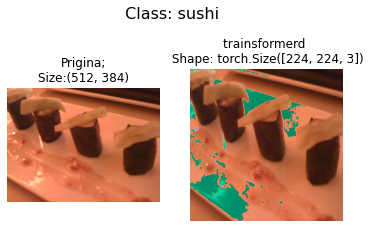

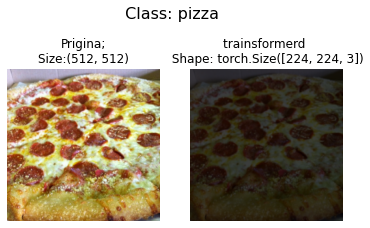

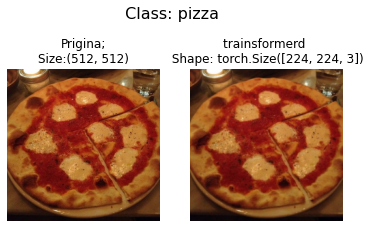

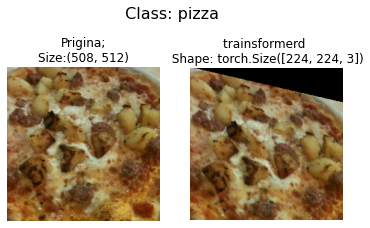

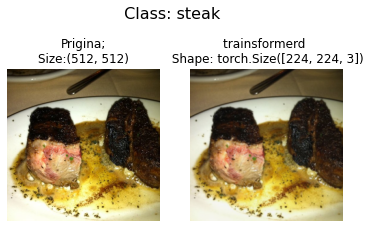

In [ ]:
# plot randomized transformed images
plot_transformed_images( image_paths = image_path_list,
                        transform = train_trainsforms_trivial,
                        n = 5,
                        seed = None
                        )

## 7. Model 0 :TinyVGG without fata augmentaion

Lets replicate the InyVGG architure from the CNN explainer wrbsite

### 7.2 Cresting transforms and loading data for model 0

In [ ]:
# Crewate simple transformation
simple_transform = transforms.Compose([transforms.Resize(size = (64,64)),
                                       transforms.ToTensor()
                                       ])

In [ ]:
from torchvision import datasets
# 1. Load and transform our data
train_data_simple = datasets.ImageFolder(root = train_dir, transform = simple_transform, target_transform = None)

test_data_simple = datasets.ImageFolder(root = test_dir, transform = simple_transform)

#22. Turn the datasets into dataloaders
import os
from torch.utils.data import DataLoader

# set up batchsize and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

# create dataloader
train_dataloader_simple = DataLoader(dataset = train_data_simple , batch_size = BATCH_SIZE, num_workers = NUM_WORKERS, shuffle = True)

test_dataloader_simple = DataLoader(dataset = test_data_simple, batch_size = BATCH_SIZE , num_workers = NUM_WORKERS, shuffle = False)
train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f69dff2f810>,
 <torch.utils.data.dataloader.DataLoader at 0x7f69dff2f910>)

### 7.2 Vreate TinYVGG Model Class 

In [ ]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, in_unit:int, hidden_units:int, out_units:int):
    super().__init__()
    self.conv_layer_1 = nn.Sequential(nn.Conv2d(in_channels = in_unit, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size = 2, stride = 2))

    self.conv_layer_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride = 1, padding = 0),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features = hidden_units *13*13, out_features = out_units))
    
  def forward(self, x):
    x = self.conv_layer_1(x)
    # print(x.shape)
    x = self.conv_layer_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(in_unit = 3, hidden_units = 10, out_units = len(class_names)).to(device)
model_0

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 atry a forward pass on a single image(to test the model)

In [ ]:
#get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
device

'cuda'

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6314e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0047e-03],
        [ 2.0999e-02,  1.2869e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7293e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4455e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7723e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8272e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

### 7.4 USe torchinfo to get an idea of the shapes
 

In [ ]:
# install torchinfo , import it if it is available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size = [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

, dataloader
## 7.5 Create trauib adb test loops for functions

* Train_step() - takes in a model and dataloader anbd trains the model on the dataloader
*test_step()- takes in a modela nd dataloader and evaluates the model on the dataloader


In [ ]:
# Create train_step()
def train_step(model:torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device= device):
  # put model in eval mode
  model.train()

  # sset up train loss and train accuracy
  train_loss, train_acc = 0,0

  # loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    #send data to the target device
    X, y = X.to(device), y.to(device)
    #1. forward pass
    y_pred = model(X)
    #2. calcu;ate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    #3. optimize the zero grad
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()
    #5. optimizer step
    optimizer.step()
    # calculate the accuracy metrix
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1), dim = 1)
    train_acc += (y_pred_class ==y).sum().item()/len(y_pred)
  
  # adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss , train_acc

In [ ]:
# create test_step 
def test_step(model:torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device = device):
  # put model in eval mode
  model.eval()
  # setup loss and test accuracy values
  test_loss, test_acc = 0,0

  # turn on inference mode
  with torch.inference_mode():
    #Loop through dataloader
    for batch, (X,y) in enumerate(dataloader):
      # send data to the target device
      X, y = X.to(device), y.to(device)

      # Foreard pass 
      test_pred_logits = model(X)
      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      #Calcultae the accuracy
      test_pred_labels =test_pred_logits.argmax(dim =1)
      test_acc += ((test_pred_labels == y).sum().item()/ len(test_pred_labels))

    #adjust the metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### Creating a train() functuction to combine train step and test step

In [ ]:
from tqdm.auto import tqdm

#1. Create a train function that takes in various model paramets + optimixerts + dataloader
def train(model:torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs:int = 5,
          device = device
          ):
  #2. Create an empt y results dictonary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}
  #3. Loop through our training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
     train_loss, train_acc = train_step(model = model, dataloader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer, device = device)

     test_loss, test_acc = test_step(model = model, dataloader= test_dataloader, loss_fn = loss_fn, device = device)

     #4. print out whats happening
     print(f"Epoch {epoch} | Train loss : {train_loss:.4f} | train acc:{train_acc:.4f} | Test loss: {test_loss:.4f} | test accuracy : {test_acc:.4f}")

     #5. updata our results dictonaries 
     results["train_loss"].append(train_loss)
     results["train_acc"].append(train_acc)
     results["test_loss"].append(test_loss)
     results["test_acc"].append(test_acc)

    #6. return the filled results at the end of the epochs
  return results

### 7/7 Trrain and evalluate model 0

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
NUM_EPOCHS = 5

# Recreate and instance of tiny VGG
model_0 = TinyVGG(in_unit = 3, # number of target image color channels
                  hidden_units = 10,
                  out_units = len(train_data.classes)).to(device)
# set up loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)

# Start the timer 
from timeit import default_timer as timer
start_time = timer()

#Train model+ 0
model_0_results = train(model = model_0,
                        train_dataloader =train_dataloader_simple,
                        test_dataloader = test_dataloader_simple, 
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs =  NUM_EPOCHS)

#End the timer and print out how long it took
end_time = timer()
print(f"total training time :{end_time-start_time:.4f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | Train loss : 1.1063 | train acc:0.3047 | Test loss: 1.0983 | test accuracy : 0.3116
Epoch 1 | Train loss : 1.0995 | train acc:0.3320 | Test loss: 1.0699 | test accuracy : 0.5417
Epoch 2 | Train loss : 1.0863 | train acc:0.4922 | Test loss: 1.0800 | test accuracy : 0.5227
Epoch 3 | Train loss : 1.0826 | train acc:0.4102 | Test loss: 1.0599 | test accuracy : 0.5729
Epoch 4 | Train loss : 1.0630 | train acc:0.4141 | Test loss: 1.0609 | test accuracy : 0.5540
total training time :8.4044 seconds


### Plot the loss curve for model 0

A loss curve is a way of tracking your models progress overtime 

A goog guide for different loss curves can be seen

In [ ]:
# Get the model 0 results keys

model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """ Plots training curves of a results dictionary"""
  # get the loss values ofthe results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # get the accuracy of the results dictionary
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # figure out hoe many epochs there were
  epochs = range(len(results["train_loss"]))

  # set up the plot
  plt.figure(figsize = (15,7))

  # plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label = "train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label = "train_accuracy")
  plt.plot(epochs , test_accuracy, label = "test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

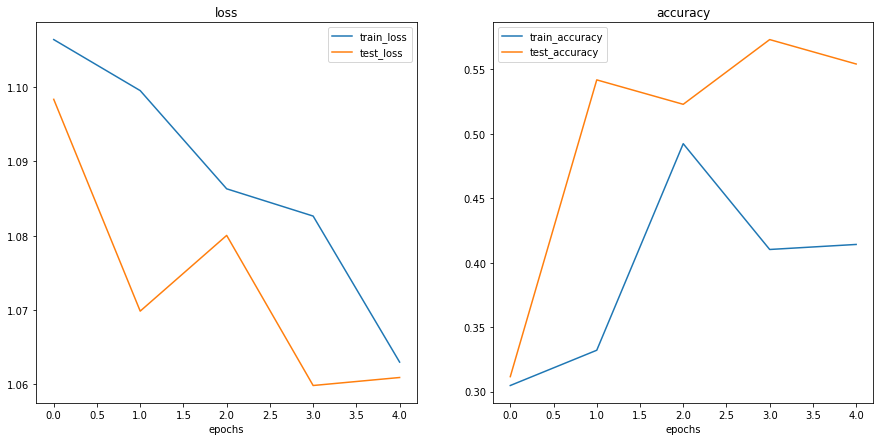

In [ ]:
plot_loss_curves(model_0_results)

### what should an ideal loss curve look like
 
  A loss curve is one of the most helpful ways to trouble shoot a model
  

### Model 1 Tiny VGG with data augmentation

now lets try another modelling experiment this time using the same model as before with some data augmentation

### 9.1 Create transforms with trasnform trivialAugment

In [ ]:
# Create training transform eith Triial aug
from torchvision import transforms
train_transforms_trivial = transforms.Compose([transforms.Resize(size = (64,64)),
                                               transforms.TrivialAugmentWide(num_magnitude_bins = 31),
                                               transforms.ToTensor()
                                               ])
test_transforms_trivial = transforms.Compose([transforms.Resize(size = (64,64)),
                                             transforms.ToTensor()])

Create train and test Dataset with Dataloaders with data augmnetation

In [ ]:
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_data_trivial  = datasets.ImageFolder(root = train_dir, transform = train_transforms_trivial, target_transform = None)

test_data_trivial = datasets.ImageFolder(root = test_dir, transform = test_transforms_trivial)

train_dataloader_trivial = DataLoader(dataset = train_data_trivial, shuffle = True, batch_size = BATCH_SIZE, num_workers =NUM_WORKERS)

test_dataloader_trivial = DataLoader(dataset = test_data_trivial, shuffle = False, batch_size = BATCH_SIZE, num_workers = NUM_WORKERS)

train_dataloader_trivial, test_dataloader_trivial

(<torch.utils.data.dataloader.DataLoader at 0x7f69f1668990>,
 <torch.utils.data.dataloader.DataLoader at 0x7f69f1668810>)

### construct and change model 1 

This time we will be using the same model but with data augmentaion'

In [ ]:
# Create model 1 and send it to the target device
model_1 = TinyVGG(in_unit = 3,
                  hidden_units = 30,
                  out_units = len(train_data_trivial.classes)).to(device)

model_1

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5070, out_features=3, bias=True)
  )
)

WonderFUl!! now weve got a model and dataloaders , lets create a loss function and optimizer and call upon our train function and evaluate our model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
NUM_EPOCHS = 5

# Set up the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

# start the timer
from timeit import default_timer as timer
start_time = timer()

# train model_1
model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_trivial,
                        test_dataloader = test_dataloader_trivial,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)
# end timer and print out how long it took
end_time = timer()
print(f'total training time for model 1 ;{end_time-start_time:.4f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0 | Train loss : 1.1067 | train acc:0.2422 | Test loss: 1.0958 | test accuracy : 0.4223
Epoch 1 | Train loss : 1.0891 | train acc:0.4180 | Test loss: 1.1153 | test accuracy : 0.2604
Epoch 2 | Train loss : 1.0801 | train acc:0.4258 | Test loss: 1.1205 | test accuracy : 0.2604
Epoch 3 | Train loss : 1.0876 | train acc:0.3047 | Test loss: 1.1110 | test accuracy : 0.3125
Epoch 4 | Train loss : 1.0444 | train acc:0.5469 | Test loss: 1.1051 | test accuracy : 0.3229
total training time for model 1 ;7.6848 seconds


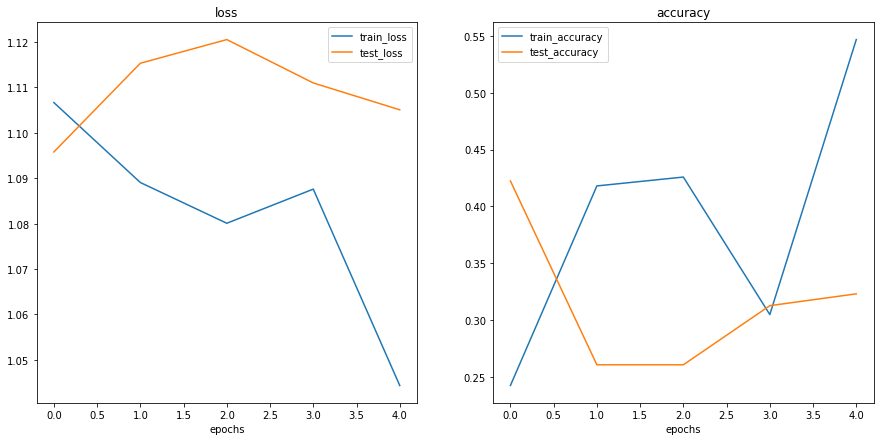

In [ ]:
plot_loss_curves(model_1_results)


## 10. Compare model results
after evaluayting our modelinng experiments on their ownm it is important to compare them to each other.

There are a few different ways to do this
1. Hard coding (whar we are doing)
2. pytiorcg + tensor board
3. Weigths and biases 
4. MLFlow 

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.106669,0.242188,1.095790,0.422348
1,1.089064,0.417969,1.115328,0.260417
2,1.080092,0.425781,1.120541,0.260417
3,1.087609,0.304688,1.110989,0.312500
4,1.044361,0.546875,1.105077,0.322917


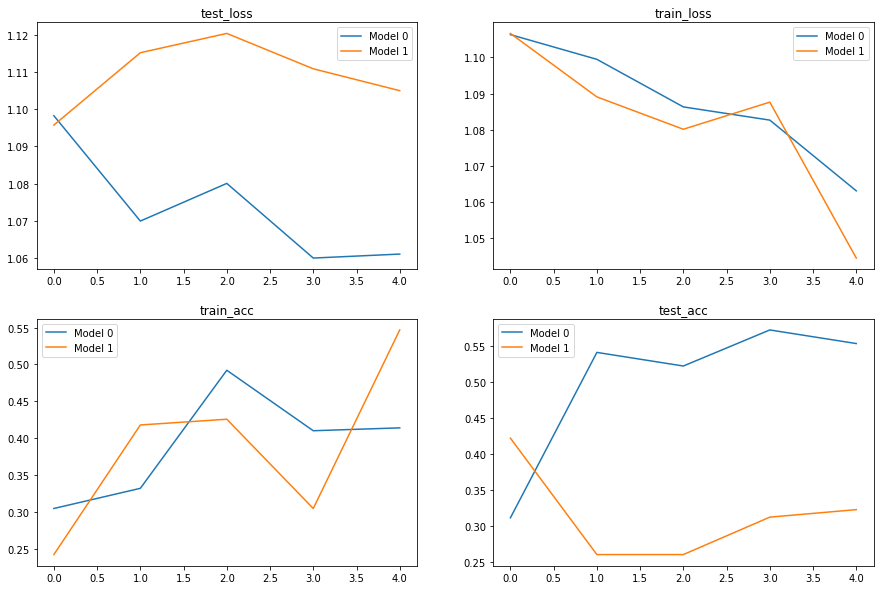

In [ ]:
# set up a plot
plt.figure(figsize = (15,10))
#get number of opeochs
epochs = range(len(model_0_df))

# plot trsain loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["train_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["train_loss"], label = "Model 1")
plt.title("train_loss")
plt.legend();

plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["test_loss"], label = "Model 0")
plt.plot(epochs, model_1_df["test_loss"], label = "Model 1")
plt.title("test_loss")
plt.legend();

# plot accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["test_acc"], label = "Model 1")
plt.title("test_acc")
plt.legend();

plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"], label = "Model 0")
plt.plot(epochs, model_1_df["train_acc"], label = "Model 1")
plt.title("train_acc")
plt.legend();